# Comparison of loss functions in the reg_1d_1 task

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time
from reg_1d_1 import *

In [2]:
def RunTest(test_name, data_x, data_y, net, device, opt, loss, N_batch, N_epoch):
  print('Running test {}...'.format(test_name))
  print(net)

  torch_dataset= torch.utils.data.TensorDataset(data_x, data_y)
  loader= torch.utils.data.DataLoader(
          dataset=torch_dataset,
          batch_size=N_batch,
          shuffle=True,
          num_workers=2)

  t_0= time.time()
  net.train()  # training mode; using dropout.
  log_loss_per_epoch= []
  for i_epoch in range(N_epoch):
    log_loss_per_epoch.append(0.0)
    for i_step, (batch_x, batch_y) in enumerate(loader):
      b_x= torch.autograd.Variable(batch_x)
      b_y= torch.autograd.Variable(batch_y)
      b_x,b_y= b_x.to(device),b_y.to(device)

      pred= net(b_x)
      err= loss(pred, b_y)  # must be (1. nn output, 2. target)

      opt.zero_grad()  # clear gradients for next train
      err.backward()
      opt.step()
      log_loss_per_epoch[-1]+= err.item()/len(loader)
      #print(i_epoch,i_step,err)
    if i_epoch%20==0:  print(i_epoch,log_loss_per_epoch[-1])
  print(test_name,': training time:',time.time()-t_0)


  #print(data_x,data_y)
  fig, (ax_lc,ax_pred) = plt.subplots(1,2,figsize=(10,5))
  true_x= np.linspace(xmin,xmax,1000).reshape((-1,1))
  ax_pred.plot(true_x, Func(true_x), color='green', linewidth=1, label='true_func')
  ax_pred.scatter(data_x, data_y, 1, color='blue', label='data')

  net.eval()  # evaluation mode; disabling dropout.
  true_x_var= torch.from_numpy(true_x).float()
  true_x_var= true_x_var.to(device)
  ax_pred.plot(true_x, net(true_x_var).data.cpu(), color='red', linewidth=2, label='nn_reg')

  ax_lc.plot(range(len(log_loss_per_epoch)), log_loss_per_epoch, color='blue', label='loss')

  ax_lc.set_title('{}: Learning curve'.format(test_name))
  ax_lc.set_xlabel('epoch')
  ax_lc.set_ylabel('loss')
  ax_lc.set_yscale('log')
  ax_lc.legend()
  ax_pred.set_title('{}: Prediction'.format(test_name))
  ax_pred.set_xlabel('x')
  ax_pred.set_ylabel('y')
  ax_pred.legend()


In [3]:
xmin,xmax= -5.0, 5.0
N_sample= 50
N_outliers= N_sample//4
#NOTE: Adjust the sample size and noise level.
data_x,data_y= GenerateSample(xmin, xmax, N_sample, Func, noise=0.5)
data_y[np.random.permutation(range(N_sample))[:N_outliers]]+= np.random.normal(scale=5.0,size=(N_outliers,1))

In [4]:
#Convert data to torch variables.
data_x= torch.autograd.Variable(torch.from_numpy(data_x).float())
data_y= torch.autograd.Variable(torch.from_numpy(data_y).float())

In [5]:
#NOTE: Switch the NN definition.
#Setup a neural network.
#net_class= TRegNN1
#net_class= DefRegNN2
#net_class= DefRegNN3
#net_class= DefRegNN4
net_class= DefRegNN5

#NOTE: Switch the device.
device= 'cpu'
#device= 'cuda'  # recommended to check by torch.cuda.is_available()

#NOTE: Switch the optimizer.
#Setup an optimizer and a loss function.
#opt= torch.optim.SGD(net.parameters(), lr=0.004)
#opt= torch.optim.SGD(net.parameters(), lr=0.002, momentum=0.95)
#opt= torch.optim.Adadelta(net.parameters(), rho=0.9, eps=1e-8)
#opt= torch.optim.Adagrad(net.parameters())
#opt= torch.optim.RMSprop(net.parameters())

#NOTE: Adjust the batch and epoch sizes.
N_batch= 50
N_epoch= 100

Running test MSELoss...
Sequential(
  (0): Linear(in_features=1, out_features=200, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.02, inplace=False)
  (3): Linear(in_features=200, out_features=200, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.02, inplace=False)
  (6): Linear(in_features=200, out_features=200, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.02, inplace=False)
  (9): Linear(in_features=200, out_features=200, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.02, inplace=False)
  (12): Linear(in_features=200, out_features=1, bias=True)
)
0 16.621938705444336
20 8.900650024414062
40 5.6158528327941895
60 4.542177200317383
80 4.237533092498779
MSELoss : training time: 4.753831386566162


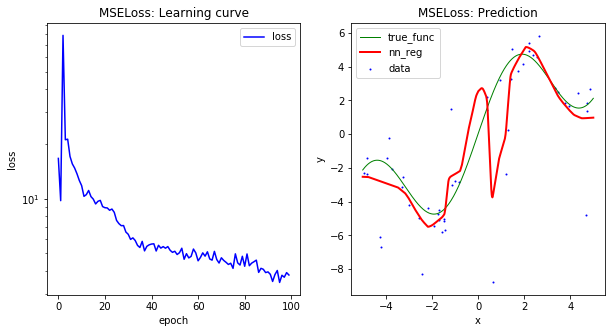

In [6]:
net= net_class()
net= net.to(device)
opt= torch.optim.Adam(net.parameters(), lr=0.01)
loss= torch.nn.MSELoss()
RunTest('MSELoss', data_x, data_y, net, device, opt, loss, N_batch, N_epoch)

Running test L1Loss...
Sequential(
  (0): Linear(in_features=1, out_features=200, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.02, inplace=False)
  (3): Linear(in_features=200, out_features=200, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.02, inplace=False)
  (6): Linear(in_features=200, out_features=200, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.02, inplace=False)
  (9): Linear(in_features=200, out_features=200, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.02, inplace=False)
  (12): Linear(in_features=200, out_features=1, bias=True)
)
0 3.6326913833618164
20 1.8857948780059814
40 1.3975826501846313
60 1.3845864534378052
80 1.3551501035690308
L1Loss : training time: 4.621306657791138


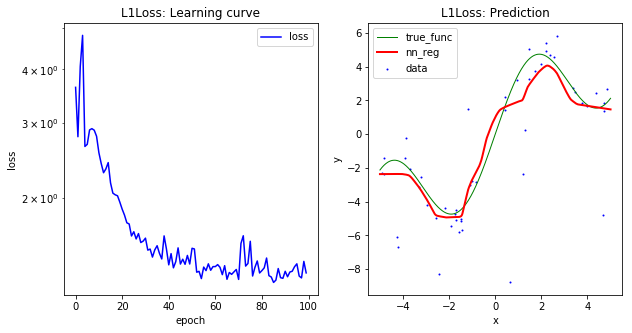

In [7]:
net= net_class()
net= net.to(device)
opt= torch.optim.Adam(net.parameters(), lr=0.01)
loss= torch.nn.L1Loss()
RunTest('L1Loss', data_x, data_y, net, device, opt, loss, N_batch, N_epoch)

Running test HuberLoss...
Sequential(
  (0): Linear(in_features=1, out_features=200, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.02, inplace=False)
  (3): Linear(in_features=200, out_features=200, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.02, inplace=False)
  (6): Linear(in_features=200, out_features=200, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.02, inplace=False)
  (9): Linear(in_features=200, out_features=200, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.02, inplace=False)
  (12): Linear(in_features=200, out_features=1, bias=True)
)
0 1.69797945022583
20 0.9681025147438049
40 0.6166555881500244
60 0.6160950064659119
80 0.5415412783622742
HuberLoss : training time: 4.549289703369141


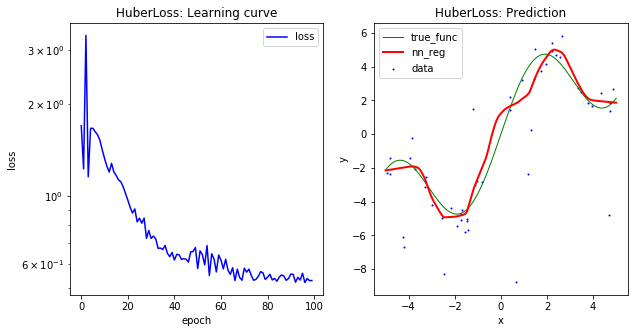

In [8]:
net= net_class()
net= net.to(device)
opt= torch.optim.Adam(net.parameters(), lr=0.01)
#opt= torch.optim.SGD(net.parameters(), lr=0.2)
loss= torch.nn.HuberLoss(reduction='mean', delta=0.5)
RunTest('HuberLoss', data_x, data_y, net, device, opt, loss, N_batch, N_epoch)